# Imports

In [127]:
import pandas as pd

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)

training = True
seed=42

# Loading Data

In [78]:
anac_df = pd.read_csv("data.csv")

/home/welberth/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [79]:
anac_df.head()

,id_basica,sg_empresa_icao,nm_empresa,nm_pais,ds_tipo_empresa,ds_di,ds_grupo_di,ds_tipo_linha,ds_servico_tipo_linha,nr_etapa,nr_ano_partida_real,nm_semestre_partida_real,nm_trimestre_partida_real,hr_partida_real,dt_partida_real,nm_mes_partida_real,nr_mes_partida_real,nm_dia_semana_partida_real,nr_dia_partida_real,sg_iata_origem,nm_pais_origem,nm_regiao_origem,sg_uf_origem,nm_municipio_origem,nr_escala_destino,hr_chegada_real,dt_chegada_real,nm_mes_chegada_real,nr_mes_chegada_real,nm_dia_semana_chegada_real,nr_dia_chegada_real,sg_iata_destino,nm_pais_destino,nm_regiao_destino,sg_uf_destino,nm_municipio_destino,nr_assentos_ofertados,nr_passag_pagos,nr_passag_gratis,sg_equipamento_icao,lt_combustivel,km_distancia,nr_horas_voadas,kg_payload,kg_bagagem_livre,kg_bagagem_excesso,kg_carga_paga,kg_peso,nr_velocidade_media,nr_carga_paga_km,nr_ask,nr_rpk
0,12017235,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S.A.,BRASIL,TRANSPORTE AÉREO REGULAR,REGULAR PREVISTO EM HOTRAN,REGULAR,DOMÉSTICA MISTA,PASSAGEIRO,2,2016.0,1º SEMESTRE,1º TRIMESTRE,06:52:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,THE,BRASIL,NORDESTE,PI,TERESINA,NaN,08:23:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,REC,BRASIL,NORDESTE,PE,RECIFE,118,83,0,E195,3442,937.0,"1,52",16842,1100,6,77,7408,"616,393",72149,110566.0,77771.0
1,12017070,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S.A.,BRASIL,TRANSPORTE AÉREO REGULAR,FRETAMENTO,NÃO REGULAR,DOMÉSTICA MISTA,PASSAGEIRO,1,2016.0,1º SEMESTRE,1º TRIMESTRE,01:43:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,SSA,BRASIL,NORDESTE,BA,SALVADOR,NaN,02:37:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,IOS,BRASIL,NORDESTE,BA,ILHÉUS,70,0,0,AT72,684,225.0,"0,9",7435,0,0,0,0,"250,491",0,15750.0,0.0
2,12017071,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S.A.,BRASIL,TRANSPORTE AÉREO REGULAR,FRETAMENTO,NÃO REGULAR,DOMÉSTICA MISTA,PASSAGEIRO,1,2016.0,1º SEMESTRE,1º TRIMESTRE,02:58:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,IOS,BRASIL,NORDESTE,BA,ILHÉUS,NaN,04:51:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,MCZ,BRASIL,NORDESTE,AL,RIO LARGO,70,33,0,AT72,1392,687.0,"1,88",7390,592,0,0,3067,"365,32",0,48090.0,22671.0
3,12017072,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S.A.,BRASIL,TRANSPORTE AÉREO REGULAR,FRETAMENTO,NÃO REGULAR,DOMÉSTICA MISTA,PASSAGEIRO,1,2016.0,1º SEMESTRE,1º TRIMESTRE,05:15:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,MCZ,BRASIL,NORDESTE,AL,RIO LARGO,NaN,06:32:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,SSA,BRASIL,NORDESTE,BA,SALVADOR,70,0,0,AT72,911,468.0,"1,28",7535,0,0,0,150,"365,496",0,32760.0,0.0
4,12017082,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S.A.,BRASIL,TRANSPORTE AÉREO REGULAR,EXTRA SEM HOTRAN,NÃO REGULAR,INTERNACIONAL MISTA,PASSAGEIRO,1,2016.0,1º SEMESTRE,1º TRIMESTRE,13:25:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,VCP,BRASIL,SUDESTE,SP,CAMPINAS,NaN,22:24:00,2016-01-01,JANEIRO,1.0,SEXTA-FEIRA,1.0,MCO,ESTADOS UNIDOS DA AMÉRICA,NaN,NaN,"ORLANDO, FLORIDA",266,260,6,A332,59747,6792.0,"8,98",49489,4665,0,619,25234,"756,301",4204250,1806670.0,1765920.0


In [76]:
anac_df.nr_dia_partida_real.value_counts()

6.0     118860
5.0     118354
18.0    118324
10.0    117754
19.0    117737
11.0    117617
14.0    117446
15.0    117395
4.0     117234
20.0    117175
17.0    117117
22.0    117091
21.0    116923
28.0    116645
26.0    116543
9.0     116531
23.0    116524
13.0    116504
12.0    116371
7.0     116296
8.0     116184
2.0     116033
27.0    115829
16.0    115773
3.0     115442
24.0    115326
25.0    115293
1.0     115056
29.0    110085
30.0    103321
31.0     67094
Name: nr_dia_partida_real, dtype: int64

# Filtering

In [95]:
df_sp = anac_df.query("sg_iata_origem == 'CGH' & sg_iata_destino == 'SDU'")
keep_list = ["id_basica",
             "sg_empresa_icao",
             "nr_etapa",
             "hr_partida_real",
             "nr_dia_partida_real",
             "nm_dia_semana_partida_real",
             "nm_mes_partida_real",
             "nr_mes_partida_real",
             "dt_partida_real",
             "hr_chegada_real",
             "nr_dia_chegada_real",
             "nm_dia_semana_chegada_real",
             "dt_chegada_real",
             "nr_ano_partida_real",
             "nr_assentos_ofertados",
             "nr_passag_pagos"]

data = df_sp[keep_list]

In [82]:
data.head()

,id_basica,sg_empresa_icao,nr_etapa,hr_partida_real,nr_dia_partida_real,nm_dia_semana_partida_real,nm_mes_partida_real,nr_mes_partida_real,dt_partida_real,hr_chegada_real,nr_dia_chegada_real,nm_dia_semana_chegada_real,dt_chegada_real,nr_ano_partida_real,nr_assentos_ofertados,nr_passag_pagos
901,12018065,AZU,1,14:40:00,2.0,SÁBADO,JANEIRO,1.0,2016-01-02,15:58:00,2.0,SÁBADO,2016-01-02,2016.0,118,64
4631,12021813,AZU,1,16:55:00,7.0,QUINTA-FEIRA,JANEIRO,1.0,2016-01-07,17:52:00,7.0,QUINTA-FEIRA,2016-01-07,2016.0,106,81
6556,12023749,AZU,1,14:40:00,9.0,SÁBADO,JANEIRO,1.0,2016-01-09,16:13:00,9.0,SÁBADO,2016-01-09,2016.0,118,78
11947,12029256,AZU,1,14:50:00,16.0,SÁBADO,JANEIRO,1.0,2016-01-16,15:41:00,16.0,SÁBADO,2016-01-16,2016.0,118,99
17303,12034688,AZU,1,14:47:00,23.0,SÁBADO,JANEIRO,1.0,2016-01-23,15:41:00,23.0,SÁBADO,2016-01-23,2016.0,118,104


In [18]:
data.dtypes

id_basica                      object
sg_empresa_icao                object
nr_etapa                        int64
hr_partida_real                object
nr_dia_partida_real           float64
nm_dia_semana_partida_real     object
nm_mes_partida_real            object
dt_partida_real                object
hr_chegada_real                object
nr_dia_chegada_real           float64
nm_dia_semana_chegada_real     object
dt_chegada_real                object
nr_ano_partida_real           float64
nr_assentos_ofertados           int64
nr_passag_pagos                 int64
dtype: object

In [97]:
data['hr_partida_round'] = data.hr_partida_real.apply( lambda x : int(x[:2]))
data['hr_chegada_round'] = data.hr_chegada_real.apply( lambda x : int(x[:2]))

/home/welberth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/welberth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
cat_encoding = {"nm_dia_semana_partida_real": {"DOMINGO": 1,"SEGUNDA-FEIRA": 2,"TERÇA-FEIRA": 3,"QUARTA-FEIRA": 4,"QUINTA-FEIRA": 5, "SEXTA-FEIRA": 6, "SÁBADO": 7},
                "nm_dia_semana_chegada_real": {"DOMINGO": 1,"SEGUNDA-FEIRA": 2,"TERÇA-FEIRA": 3,"QUARTA-FEIRA": 4,"QUINTA-FEIRA": 5, "SEXTA-FEIRA": 6, "SÁBADO": 7}}

In [99]:
data_enc = data.replace(cat_encoding)

In [100]:
data_enc.drop(['id_basica','sg_empresa_icao','nr_etapa','hr_partida_real','nr_ano_partida_real','dt_chegada_real','hr_chegada_real','nm_mes_partida_real'],axis=1, inplace=True)

In [143]:
data_enc.head()

,nr_dia_partida_real,nm_dia_semana_partida_real,nr_mes_partida_real,dt_partida_real,nr_dia_chegada_real,nm_dia_semana_chegada_real,nr_assentos_ofertados,nr_passag_pagos,hr_partida_round,hr_chegada_round
901,2.0,7,1.0,2016-01-02,2.0,7,118,64,14,15
4631,7.0,5,1.0,2016-01-07,7.0,5,106,81,16,17
6556,9.0,7,1.0,2016-01-09,9.0,7,118,78,14,16
11947,16.0,7,1.0,2016-01-16,16.0,7,118,99,14,15
17303,23.0,7,1.0,2016-01-23,23.0,7,118,104,14,15


In [149]:
data_grouped = data_enc.groupby(['nr_dia_partida_real','nm_dia_semana_partida_real','nr_mes_partida_real','dt_partida_real','nr_dia_chegada_real','nm_dia_semana_chegada_real','hr_partida_round','hr_chegada_round'])[['nr_passag_pagos','nr_assentos_ofertados']].agg('sum').reset_index()

In [151]:
data_grouped.shape

(31517, 10)

In [152]:
data_grouped.head()

,nr_dia_partida_real,nm_dia_semana_partida_real,nr_mes_partida_real,dt_partida_real,nr_dia_chegada_real,nm_dia_semana_chegada_real,hr_partida_round,hr_chegada_round,nr_passag_pagos,nr_assentos_ofertados
0,1.0,1,1.0,2017-01-01,1.0,1,8,8,60,177
1,1.0,1,1.0,2017-01-01,1.0,1,9,9,53,144
2,1.0,1,1.0,2017-01-01,1.0,1,9,10,93,297
3,1.0,1,1.0,2017-01-01,1.0,1,10,11,292,465
4,1.0,1,1.0,2017-01-01,1.0,1,11,11,119,177


# EDA

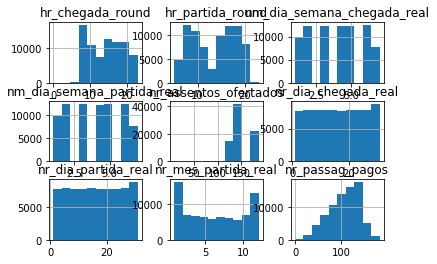

In [120]:
data_enc.hist();

# Modeling

In [153]:
X = data_grouped.drop(['nr_passag_pagos','dt_partida_real','nr_assentos_ofertados'],axis=1)
y = data_grouped.nr_passag_pagos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [154]:
X_train.head()

,nr_dia_partida_real,nm_dia_semana_partida_real,nr_mes_partida_real,nr_dia_chegada_real,nm_dia_semana_chegada_real,hr_partida_round,hr_chegada_round
22141,22.0,3,11.0,22.0,3,15,16
12534,13.0,1,10.0,13.0,1,9,10
14244,14.0,5,11.0,14.0,5,14,15
6232,7.0,1,1.0,7.0,1,19,20
24738,24.0,7,2.0,24.0,7,7,8


In [155]:
if training:

    rf = RandomForestRegressor(random_state=seed, n_jobs=-1)

    param_grid = {'n_estimators' : [300,350,400],
                  'max_depth' : [20,30],
                  'max_features':['auto','sqrt']}

    grid = GridSearchCV(rf, param_grid=param_grid, cv=5,return_train_score = True).fit(X_train, y_train)

    reg_rf = grid.best_estimator_.fit(X_train,y_train)

    print(grid.best_params_)
    print(grid.cv_results_)

{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 400}
{'mean_fit_time': array([5.42074451, 6.16033888, 6.36355395, 2.29721417, 2.68308535,
       3.20125194, 6.3970602 , 6.98163285, 7.55699291, 2.73779736,
       3.11694703, 3.5561172 ]), 'std_fit_time': array([1.19863847, 0.69132836, 0.03604835, 0.0343396 , 0.04094109,
       0.20990743, 1.03252124, 0.46623462, 0.21464211, 0.02345367,
       0.1193672 , 0.01721959]), 'mean_score_time': array([0.20493937, 0.20395069, 0.20367913, 0.20411153, 0.20399089,
       0.20491409, 0.28626099, 0.28644395, 0.24476957, 0.20432482,
       0.20424867, 0.20451584]), 'std_score_time': array([7.02120460e-04, 5.87862583e-04, 7.29099879e-04, 5.03800074e-04,
       6.31730172e-04, 1.22353224e-03, 7.65266859e-02, 1.19629157e-01,
       5.04169169e-02, 7.90822870e-04, 5.56326671e-04, 9.67062436e-05]), 'param_max_depth': masked_array(data=[20, 20, 20, 20, 20, 20, 30, 30, 30, 30, 30, 30],
             mask=[False, False, False, False, False, False, Fa

In [156]:
print("train MAE: {}".format(mean_absolute_error(y_train,reg_rf.predict(X_train))))
print("test MAE: {}".format(mean_absolute_error(y_test,reg_rf.predict(X_test))))

train MAE: 48.91573335014196
test MAE: 89.36791136388348


In [157]:
X_test['pred'] = reg_rf.predict(X_test)
X_test['real'] = y_test

/home/welberth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/welberth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [158]:
X_test.head(20)

,nr_dia_partida_real,nm_dia_semana_partida_real,nr_mes_partida_real,nr_dia_chegada_real,nm_dia_semana_chegada_real,hr_partida_round,hr_chegada_round,pred,real
17464,17.0,6,11.0,17.0,6,20,21,407.042896,541
5466,6.0,3,2.0,6.0,3,14,15,221.437470,214
8247,8.0,7,7.0,8.0,7,11,12,230.836417,271
9509,10.0,2,2.0,10.0,2,8,10,223.422417,121
25562,25.0,5,7.0,25.0,5,7,8,403.497414,542
2884,3.0,6,3.0,3.0,6,8,9,391.996619,227
21819,22.0,1,9.0,22.0,1,15,16,561.421397,257
18669,19.0,1,3.0,19.0,1,11,12,212.221103,189
4469,5.0,3,1.0,5.0,3,17,18,310.114131,270
12758,13.0,3,3.0,13.0,3,14,15,266.039279,173
